In [1]:
import hipscat
import healpy as hp
import pandas as pd
from tqdm import tqdm
from hipscat.inspection import plot_pixel_list
from hipscat.pixel_math import HealpixPixel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
big_beautiful_frame = pd.read_csv("num_bins.csv")

big_beautiful_frame["num_bins"].max()

15

In [3]:
bin_hist, bin_bins = np.histogram(big_beautiful_frame["num_bins"], bins = np.arange(0, 15))

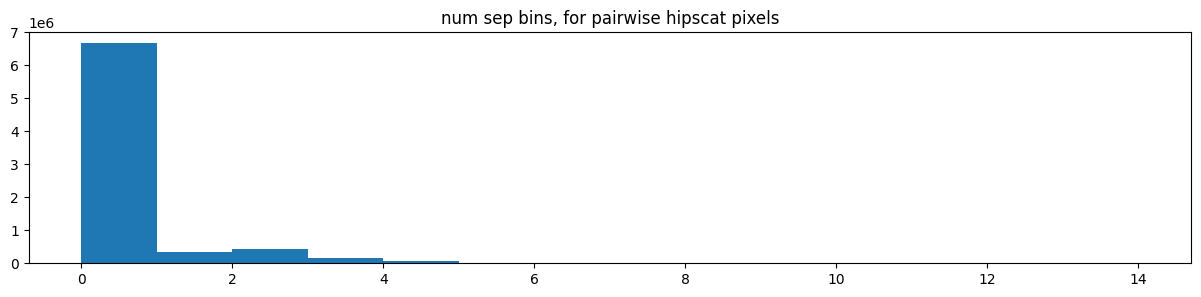

In [4]:
width = np.diff(bin_bins)
center = (bin_bins[:-1] + bin_bins[1:]) / 2

fig, ax = plt.subplots(figsize=(15,3))
ax.bar(center, bin_hist, align='center', width=width)
# ax.set_yscale('log')
plt.title(f"num sep bins, for pairwise hipscat pixels")
plt.show()

In [5]:
bin_hist

array([6672582,  337619,  433515,  165429,   56922,   22745,   18439,
          9241,   11312,    4606,    2460,    1026,     216,      97])

In [11]:
num_pairs = np.sum(bin_hist)
proportion = bin_hist / num_pairs

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

proportion

array([0.863, 0.044, 0.056, 0.021, 0.007, 0.003, 0.002, 0.001, 0.001,
       0.001, 0.   , 0.   , 0.   , 0.   ])

86% of tile pairs will have only NO separation bins (e.g. they are too far away to have any reasonable overlap in the example bins). These pairings can be completely skipped!!!!!

In [8]:
nonzero_bins = bin_hist[1:]

num_pairs = np.sum(nonzero_bins)
proportion = nonzero_bins / num_pairs
proportion

array([0.317, 0.408, 0.156, 0.054, 0.021, 0.017, 0.009, 0.011, 0.004,
       0.002, 0.001, 0.   , 0.   ])

Considering just the nonzero bins that we'll want to calculate:

~30% have only ONE overlapping bin. In this case, we only need the **total** masked count for these tile-pairs. We can just multiply the particle population, and put that product into the single expected bin.

~40% will have two possible bins. Once pair separations have been determined, the binning clause can be quickly short-circuited. We will know BEFORE loading the parquet tiles into memory what the possible bins are. Can pass just the dividing line between bins to counting routine! Could just return `count sep less than X`.

Remaining ~30% of tile pairs have 3+ possible bins. These are the smallest separations, and the ones that we will spend the most time on (and where we SHOULD be spending the most time getting the counts right!). Considering the full population, this is only around 4% of all pairwise combinations.

In [9]:
## "long tail" of 3+ possible bins
nonzero_bins[2:].sum() / nonzero_bins.sum()

0.27499583970696495

In [12]:
## "long tail" of 3+ possible bins, out of the TOTAL number of possible pairwise combinations
bin_hist[3:].sum() / bin_hist.sum()

0.03780831153863604